### Desafío 1: Prepare el ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [4]:
df.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

In [5]:
#Gender
df['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [6]:
#gender
df['f_male'] = np.where(df['Gender'].str.strip() == 'Male', 1, 0)

In [7]:
#Student
df['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [8]:
#Student
df['f_student'] = np.where(df['Student'] == 'Yes', 1, 0)

In [9]:
#Married
df['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [10]:
#Single
df['f_single'] = np.where(df['Married'] == 'No', 1, 0)

In [11]:
#Ethnicity
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [12]:
#AfricanAmerican
df['f_AfricanAmerican'] = np.where(df['Ethnicity'] == 'African American', 1, 0)

In [13]:
#Asian
df['f_Asian'] = np.where(df['Ethnicity'] == 'Asian',1,0)

In [14]:
df.head(10)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   
5   80.180   8047     569      4   77         10    Male      No      No   
6   20.996   3388     259      2   37         12  Female      No      No   
7   71.408   7114     512      2   87          9    Male      No      No   
8   15.125   3300     266      5   66         13  Female      No      No   
9   71.061   6819     491      3   41         19  Female     Yes     Yes   

          Ethnicity  Balance  f_male  f_student  f_single  f_AfricanAmerican  \
0         Caucasian      333       1          0         0                  0   
1             Asian      903       0          1         0                  0   
2             Asian      580       1          0         1                  0   
3             Asian      964       0          0         1                  0   
4         Caucasian      331       1          0         0                  0   
5         Caucasian     1151       1          0         1                  0   
6  African American      203       0          0         1                  1   
7             Asian      872       1          0         1                  0   
8         Caucasian      279       0          0         1                  0   
9  African American     1350       0          1         0                  1   

   f_Asian  
0        0  
1        1  
2        1  
3        1  
4        0  
5        0  
6        0  
7        1  
8        0  
9        0

### Desafío 2: Genere gráficos descriptivos para las variables contínuas.

In [15]:
def plot_hist(df, var):
    plt.figure(figsize=(8,5))
    media=df[var].mean()
    mediana=df[var].median()
    plt.hist(df[var], color='forestgreen', alpha=.5)
    plt.hist(media, color='crimson', label=f'$\mu={round(media,3)}$')
    plt.hist(mediana, color='skyblue', label=f'$M_e={round(mediana,3)}$')
    plt.axvline(media, color='crimson')
    plt.axvline(mediana, color='skyblue')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(f'Hist({var})')
    plt.legend()
    plt.tight_layout()

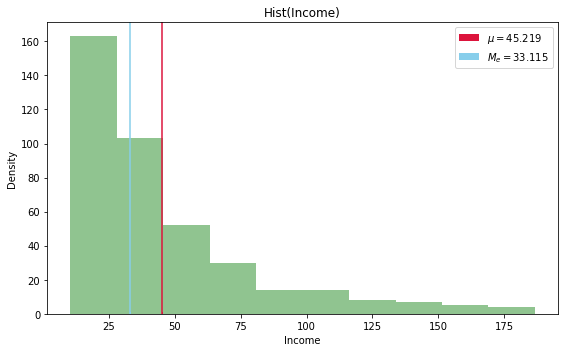

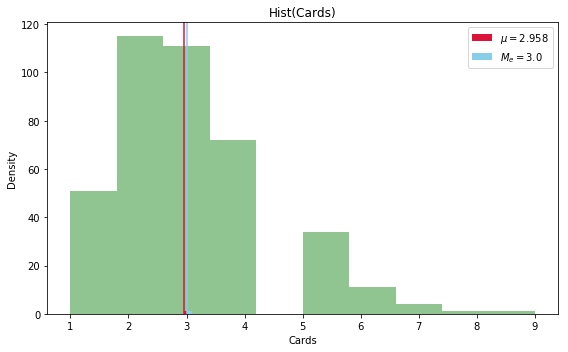

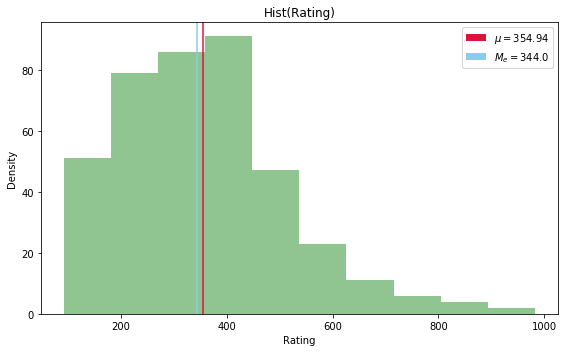

In [16]:
interes = ('Balance','Income','Cards','Rating')
for i in interes:
    plot_hist(df,i)

* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

R: $Ratings$ y $Cards$ muestran valores muy similares de media y mediana sumamente similares, indicando una distribución geométrica de datos. En $Balance$ e $Income$ se observa ya una diferencia entre ambas.

### Desafío 3: Regresión Lineal Simple

In [17]:
variables = {'Income':'Ingreso anual disponible en miles de dólares',
            'Limit':'Límite del crédito',
            'Rating':'Ranking del crédito',
            'Cards':'Cantidad de tarjetas de credito',
            'Age':'Edad del usuario',
            'Education':'Años de educación del usuario',
            'Balance':'Promedio de deuda en tarjeta de crédito de usuario'}
df.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  f_male  f_student  f_single  f_AfricanAmerican  f_Asian  
0  Caucasian      333       1          0         0                  0        0  
1      Asian      903       0          1         0                  0        1  
2      Asian      580       1          0         1                  0        1  
3      Asian      964       0          0         1                  0        1  
4  Caucasian      331       1          0         0                  0        0

In [18]:
#Balance ~ Student
modelo_1 = smf.ols('Balance ~ f_student', df).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        15:59:59   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
f_student    396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Balance ~ Income
modelo_2 = smf.ols('Balance ~ Income', df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        15:59:59   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Balance ~ Rating
modelo_3 = smf.ols('Balance ~ Rating', df).fit()
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        16:00:00   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* ¿Qué variable presenta un mayor poder explicativo de la variabilidad de $Balance$?

R: En este caso la variable $Rating$ presenta un mayor R-squared lo que indica que tiene un mayor poder explicativo en la variabilidad de $Balance$.

* ¿Qué podemos decir sobre el comportamiento de $Student$?

R: El coeficiente de correlación es muy bajo, por lo que no afecta mucho la variabilidad de $Balance$.

* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de $Balance$ entre aquellos que son y no son estudiantes?

In [21]:
estudiantes = df.query('f_student == 1')['Balance'].dropna()
no_estudiantes = df.query('f_student == 0')['Balance'].dropna()
stats.ttest_ind(estudiantes, no_estudiantes)

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

R: Existen diferencias significativas entre quienes son estudiantes y quienes no. Esto indica que quienes son estudiatenes tienen un mayor promedio de deuda.

### Desafío 4: Genere un modelo que incluya todos los regresores.

In [22]:
variables = {'Income':'Ingreso anual disponible en miles de dólares',
            'Limit':'Límite del crédito',
            'Rating':'Ranking del crédito',
            'Cards':'Cantidad de tarjetas de credito',
            'Age':'Edad del usuario',
            'Education':'Años de educación del usuario',
            'Balance':'Promedio de deuda en tarjeta de crédito de usuario'}
df.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  f_male  f_student  f_single  f_AfricanAmerican  f_Asian  
0  Caucasian      333       1          0         0                  0        0  
1      Asian      903       0          1         0                  0        1  
2      Asian      580       1          0         1                  0        1  
3      Asian      964       0          0         1                  0        1  
4  Caucasian      331       1          0         0                  0        0

In [23]:
modelo_4 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + f_male + f_student + f_single + f_AfricanAmerican + f_Asian', df).fit()
modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 04 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        16:00:00   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -488.2880     34.816    -14.025      0.000    -556.740    -419.836
Income               -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                 0.1909      0.033      5.824      0.000       0.126       0.255
Rating                1.1365      0.491      2.315      0.021       0.171       2.102
Cards                17.7245      4.341      4.083      0.000       9.190      26.259
Age                  -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education            -1.0989      1.598     -0.688      0.492      -4.241       2.043
f_male               10.6532      9.914      1.075      0.283      -8.839      30.145
f_student           425.7474     16.723     25.459      0.000     392.869     458.626
f_single              8.5339     10.363      0.824      0.411     -11.841      28.908
f_AfricanAmerican   -10.1070     12.210     -0.828      0.408     -34.113      13.899
f_Asian               6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comente
La utilización de todos los regresores aumentó notoriamente el resultado de R-squared, mejorado el poder explicativo sobre Balance. Sin embargo, aumentó también notoriamente 'Prob (F-statistic)', indicando mayor variabilidad. También se observa que varias variables muestran p-value > 0.025, indicando presencia de variables que no son significativas y es conveniente dejar fuera del análisis antes de continuar.

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

In [24]:
modelo_5 = smf.ols('Balance ~ Income + Limit + Rating + Cards + f_student', df).fit()
modelo_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):          3.60e-261
Time:                        16:00:00   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income        -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit          0.1944      0.033      5.977      0.000       0.130       0.258
Rating         1.0879      0.487      2.234      0.026       0.130       2.045
Cards         17.8517      4.335      4.118      0.000       9.329      26.374
f_student    426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores. ¿Mejoró o empeoró el modelo con la reducción de regresores?

R: Al limitarlo sólo a las 5 variables con p-value ≤ 0.025, el R-squared se mantiene, mostrando la poca influencia que tenían las demás variables sobre 'Balance'. Tiene sentido considerando que las variables 'Income' (ingreso), 'Limit' (límite de crédito), 'Rating' (Ranking de crédito), 'Cards' (n° de tarjetas) y 'Student' (si es estudiante) justamente indican la capacidad de crédito de una persona, y por tanto, su 'Balance' (promedio de deuda).

### Desafío 6: Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes

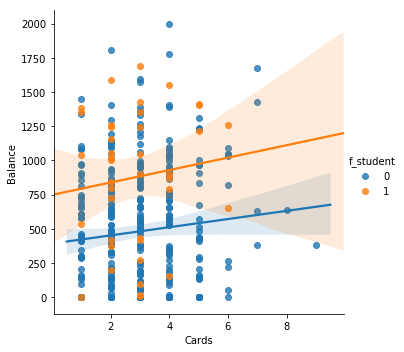

In [25]:
sns.lmplot(x='Cards', y='Balance', data=df, hue='f_student')

In [26]:
sns.lmplot(x='Income', y='Balance', data=df, hue='f_student')

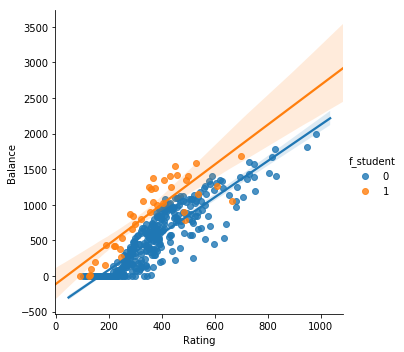

In [27]:
sns.lmplot(x='Rating', y='Balance', data=df, hue='f_student')